In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style('whitegrid')

In [6]:
df = pd.read_csv('netflix_titles_nov_2019.csv')

In [8]:
df


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


In [10]:
df.dropna(subset=['date_added', 'rating'], inplace=True)

In [16]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

In [18]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

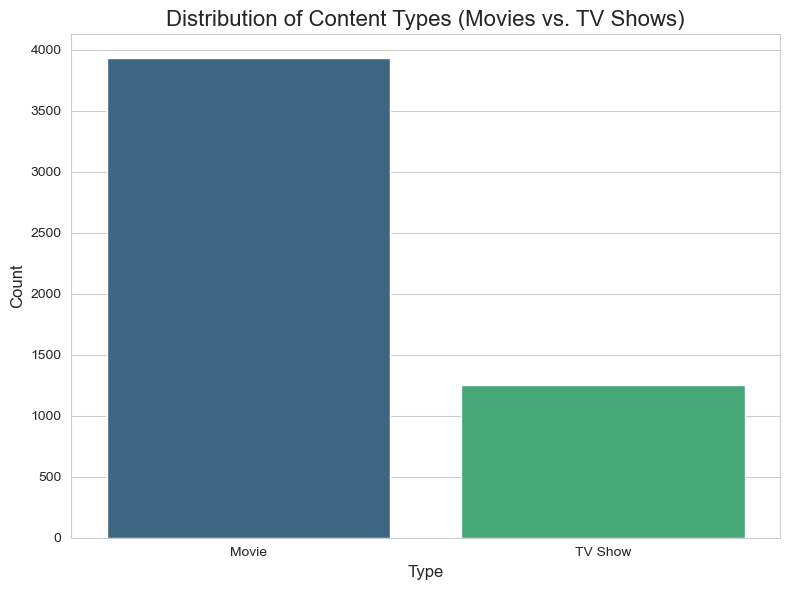

In [24]:
content_counts = df['type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=content_counts.index, y=content_counts.values, palette='viridis',hue=content_counts.index,legend=False)
plt.title('Distribution of Content Types (Movies vs. TV Shows)', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('content_type_distribution.png')
plt.show()

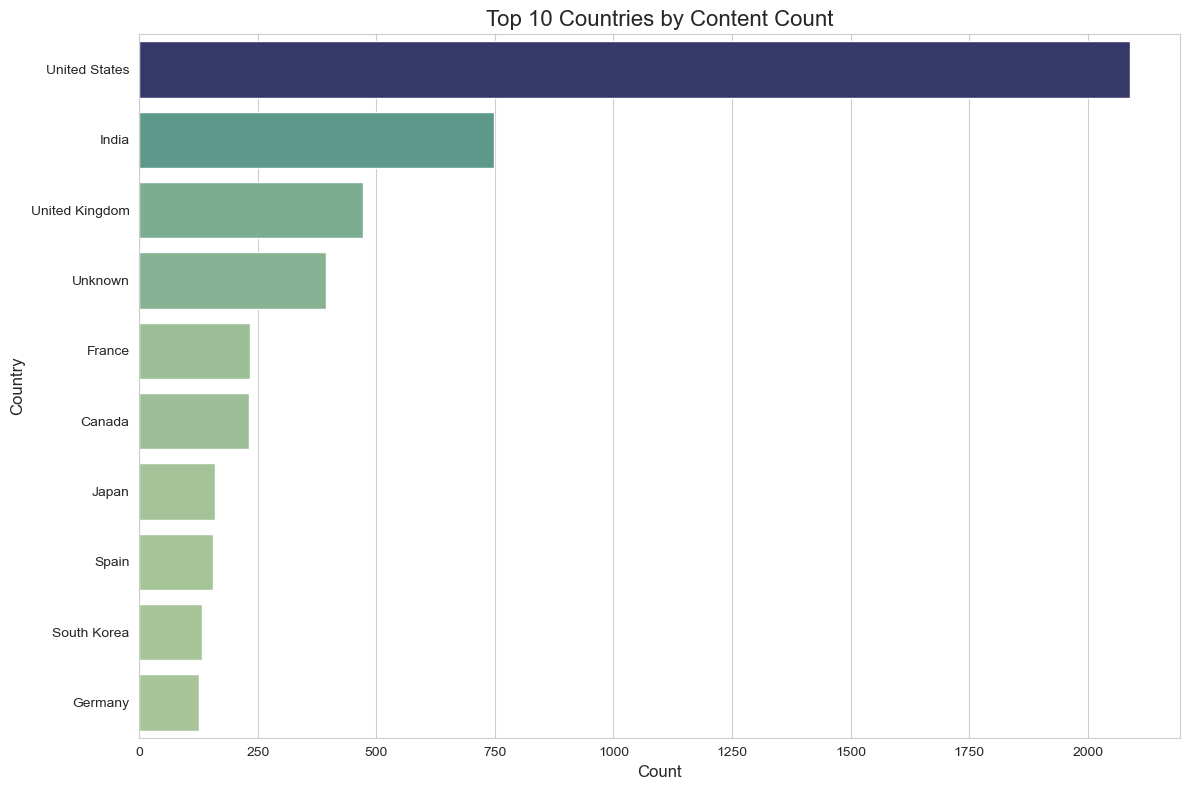

In [30]:
countries = df['country'].str.split(', ').explode()
top_10_countries = countries.value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='crest',hue=top_10_countries.values,legend=False)
plt.title('Top 10 Countries by Content Count', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('top_10_countries.png')
plt.show()

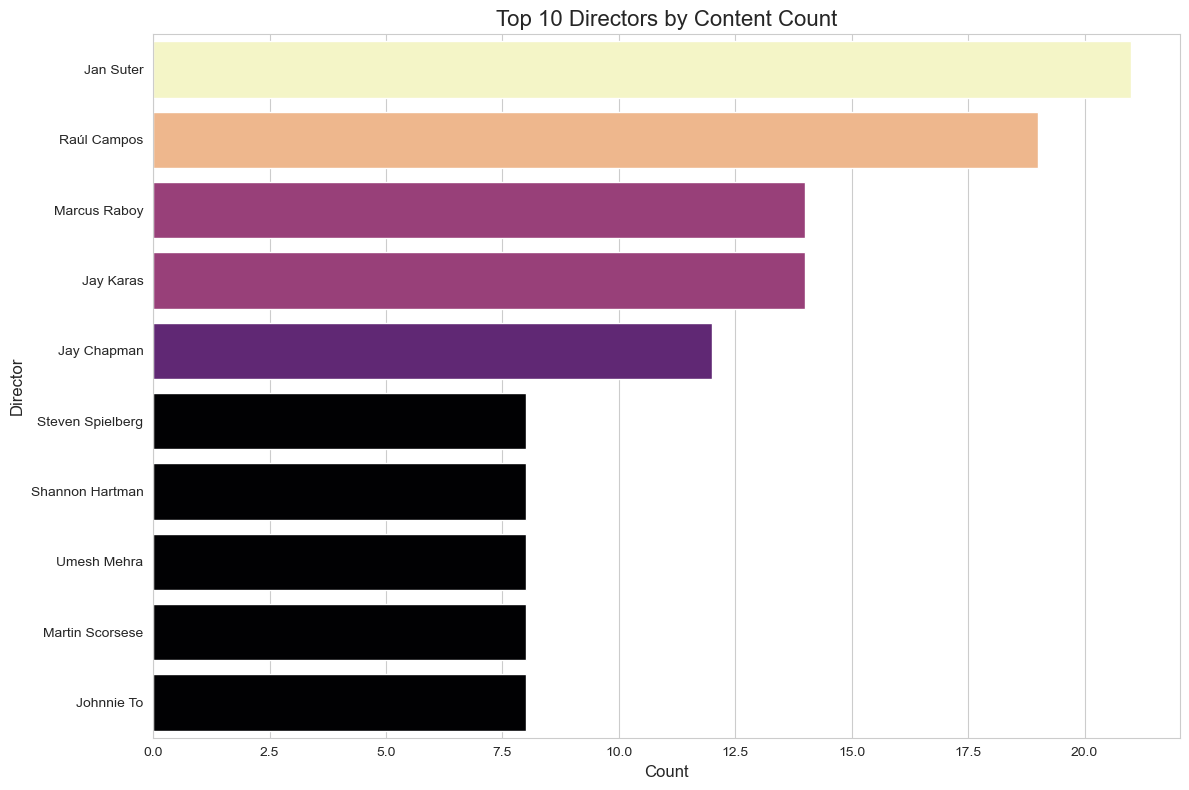

In [36]:
directors = df[df['director'] != 'Unknown']['director'].str.split(', ').explode()
top_10_directors = directors.value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='magma',hue=top_10_directors.values,legend=False)
plt.title('Top 10 Directors by Content Count', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('top_10_directors.png')
plt.show()

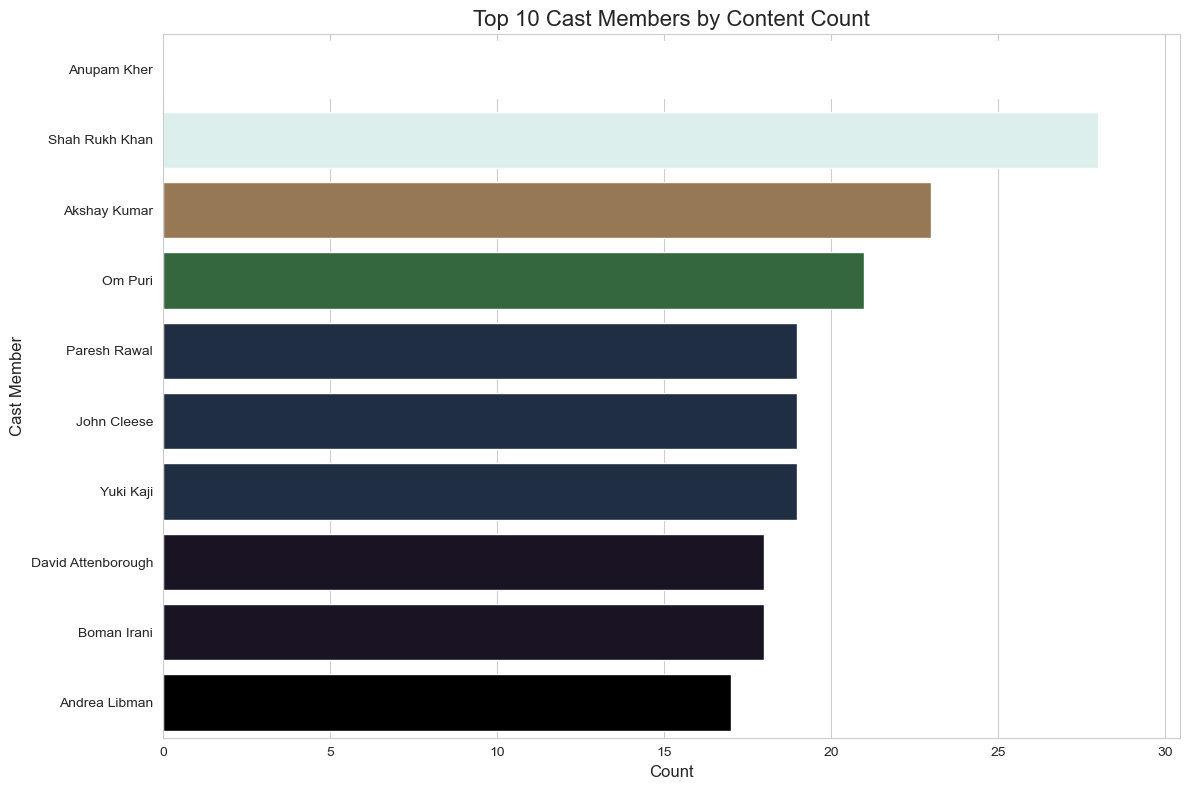

In [42]:
cast = df[df['cast'] != 'Unknown']['cast'].str.split(', ').explode()
top_10_cast = cast.value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_cast.values, y=top_10_cast.index, palette='cubehelix',hue=top_10_cast.values,legend=False)
plt.title('Top 10 Cast Members by Content Count', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cast Member', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('top_10_cast.png')
plt.show()

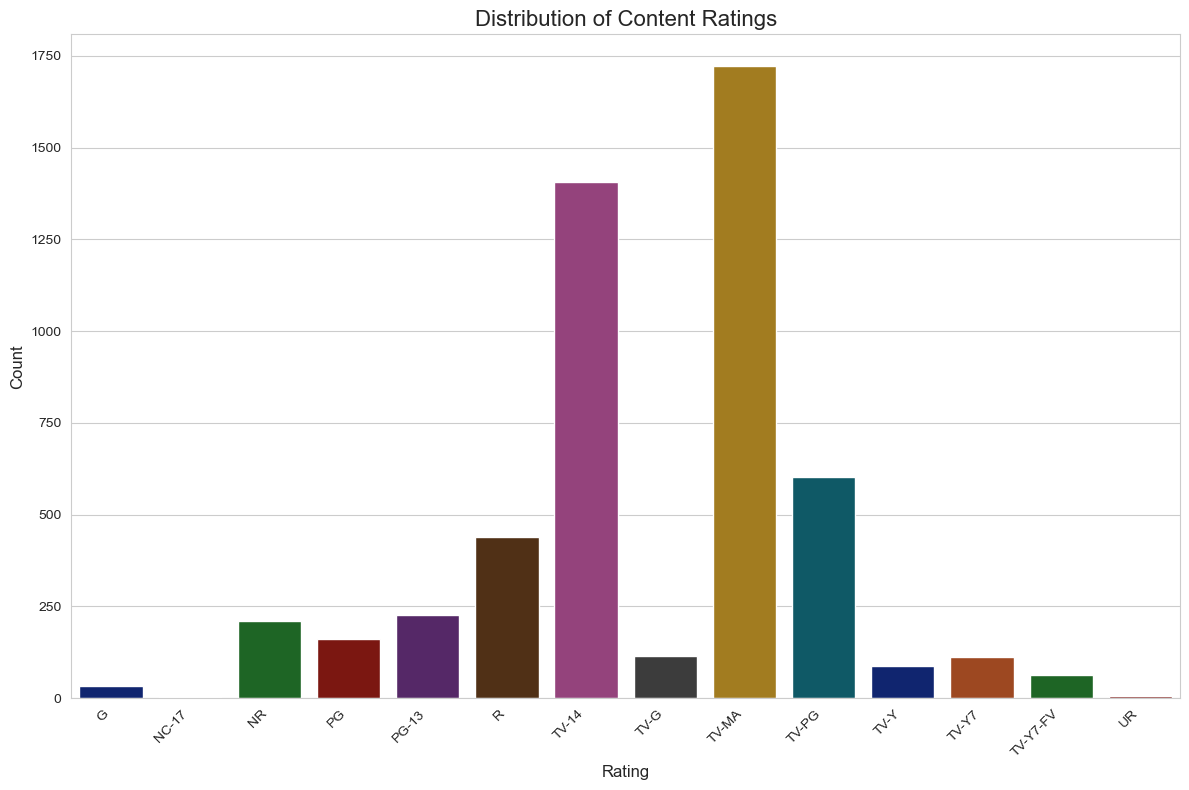

In [47]:
ratings_counts = df['rating'].value_counts().sort_index()
plt.figure(figsize=(12, 8))
sns.barplot(x=ratings_counts.index, y=ratings_counts.values, palette='dark',hue=ratings_counts.index,legend=False)
plt.title('Distribution of Content Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('rating_distribution.png')
plt.show()

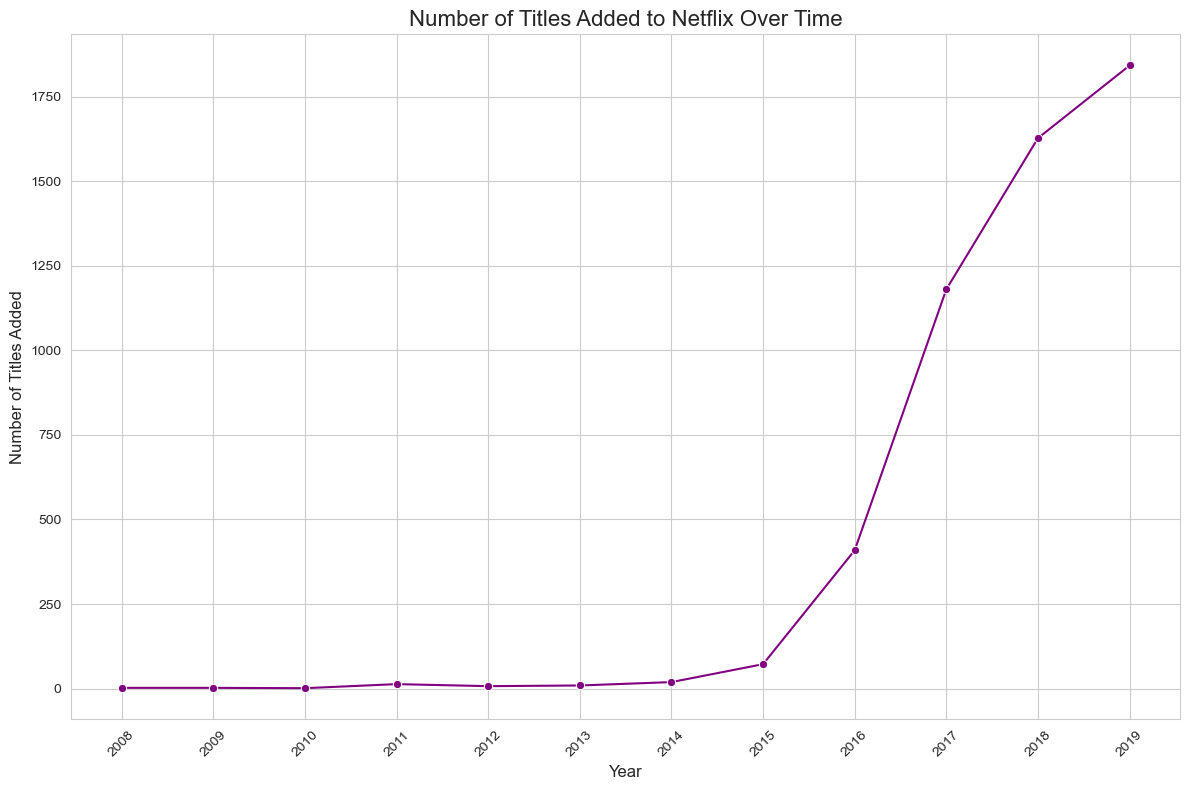

In [49]:
content_by_year = df.groupby('year_added').size()
plt.figure(figsize=(12, 8))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o', color='purple')
plt.title('Number of Titles Added to Netflix Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xticks(content_by_year.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('content_added_over_time.png')
plt.show()

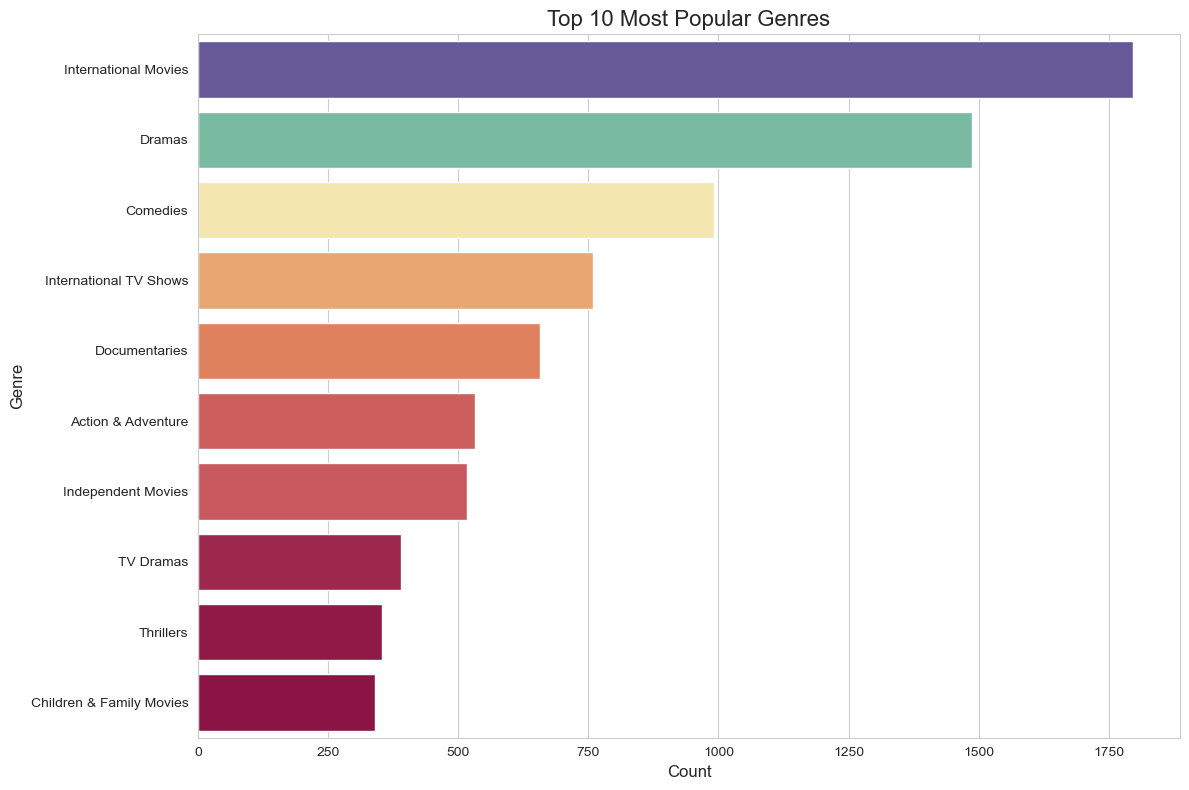

In [53]:
genres = df['listed_in'].str.split(', ').explode()
top_10_genres = genres.value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='Spectral',hue=top_10_genres.values,legend=False)
plt.title('Top 10 Most Popular Genres', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('top_10_genres.png')
plt.show()

In [55]:
df.to_csv('netflix_titles_cleaned.csv', index=False)